In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pytz import timezone
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from apyori import apriori

## Part I

In [3]:
df1 = pd.read_csv("2019-Oct.csv")
df2 = pd.read_csv("2019-Nov.csv")

df1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [4]:
# step 1
df1.dropna(axis=0, inplace=True)
df2.dropna(axis=0, inplace=True)

# step 2
frames = [df1, df2]
df = pd.concat(frames)

df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
...,...,...,...,...,...,...,...,...,...
67501972,2019-11-30 23:59:57 UTC,view,12301059,2053013556311359947,construction.tools.drill,bosch,266.16,562661595,7165dc28-9cba-40a0-9ed8-76fd909ccb3b
67501975,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [5]:
# step 3
data1 = df.drop(['product_id','category_id','category_code','brand'], axis=1)
data1=data1.loc[data1.event_type == 'purchase']
data1.head()

,event_time,event_type,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
442,2019-10-01 00:07:07 UTC,purchase,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
603,2019-10-01 00:09:54 UTC,purchase,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68


In [6]:
data1.dtypes

event_time       object
event_type       object
price           float64
user_id           int64
user_session     object
dtype: object

In [7]:
data1['event_time']=pd.to_datetime(data1['event_time'])
data1.dtypes

event_time      datetime64[ns, UTC]
event_type                   object
price                       float64
user_id                       int64
user_session                 object
dtype: object

In [8]:
# step 4
data1 = data1.groupby(by='user_session').agg(order_date=('event_time',lambda x: x.max()),
                                             user_id=('user_id',lambda x: x.unique()),
                                             quantity=('user_session','count'),
                                             gtv=('price','sum')).reset_index(drop=True)
data1

,order_date,user_id,quantity,gtv
0,2019-10-06 11:34:30+00:00,546521725,1,289.52
1,2019-10-25 08:39:11+00:00,560486342,1,171.90
2,2019-11-11 03:35:34+00:00,566954797,1,151.61
3,2019-10-17 13:37:59+00:00,560744406,2,379.78
4,2019-10-15 08:09:02+00:00,520649833,1,90.07
...,...,...,...,...
1025273,2019-10-04 08:53:59+00:00,519348985,1,360.34
1025274,2019-11-17 14:47:28+00:00,521378371,1,269.97
1025275,2019-11-24 08:34:23+00:00,513821974,1,977.86
1025276,2019-11-28 09:41:58+00:00,515196983,2,945.70


In [9]:
# step 5 
data1["order_date"].max()

Timestamp('2019-11-30 23:59:15+0000', tz='UTC')

In [10]:
type(data1)

pandas.core.frame.DataFrame

In [11]:
utc = pytz.utc
by_date = dt.datetime(2019,12,1,0,0,0,tzinfo=pytz.utc)
data1['recent_purchase'] = by_date - data1['order_date']
data1['recent_purchase'].astype('timedelta64[D]')
data1['recent_purchase']= data1['recent_purchase'] / np.timedelta64(1, 'D')
data1.head()

,order_date,user_id,quantity,gtv,recent_purchase
0,2019-10-06 11:34:30+00:00,546521725,1,289.52,55.517708
1,2019-10-25 08:39:11+00:00,560486342,1,171.90,36.639456
2,2019-11-11 03:35:34+00:00,566954797,1,151.61,19.850301
3,2019-10-17 13:37:59+00:00,560744406,2,379.78,44.431956
4,2019-10-15 08:09:02+00:00,520649833,1,90.07,46.660394


In [12]:
# Recency, Frequency, and, Monetary calculation
rfm = data1.groupby('user_id').agg(recency = ('recent_purchase', lambda x:x.min()),
                                  frequency = ('user_id', lambda x:x.count()),
                                  monetary = ('gtv', lambda x:x.sum()))
rfm.head()

,recency,frequency,monetary
user_id,,,
225644257,18.819780,1,40.91
253299396,24.546169,1,246.85
256164170,10.651921,1,113.23
296197073,0.631377,1,51.46
299358698,21.860127,1,154.19


In [13]:
# step 6 
rfm['recency'].describe()

count    533572.000000
mean         25.516806
std          17.339359
min           0.000521
25%          13.278426
50%          20.908183
75%          40.480836
max          60.992407
Name: recency, dtype: float64

In [14]:
rfm['frequency'].describe()

count    533572.000000
mean          1.921536
std           2.876131
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         328.000000
Name: frequency, dtype: float64

In [15]:
rfm['monetary'].describe()

count    533572.000000
mean        834.804170
std        2490.450855
min           0.870000
25%         154.390000
50%         308.860000
75%         795.890000
max      344153.290000
Name: monetary, dtype: float64

In [16]:
rfm.quantile(q = [0.20, 0.40, 0.60, 0.80])

,recency,frequency,monetary
0.2,10.626563,1.0,131.53
0.4,14.474602,1.0,243.51
0.6,28.504262,1.0,447.84
0.8,44.303067,2.0,977.64


In [17]:
quartiles = rfm.quantile(q = [0.50, 0.75]).to_dict()
quartiles

{'recency': {0.5: 20.90818287037037, 0.75: 40.48083622685186},
 'frequency': {0.5: 1.0, 0.75: 2.0},
 'monetary': {0.5: 308.86, 0.75: 795.89}}

In [18]:
# step 7
# for Frequency only, as it has duplicates
def f_scoring(x, p, d):
    if x <= d[p][0.50]:
        return 1
    elif x <= d[p][0.75]:
        return 2
    else:
        return 3

# calculate total score per user_id
def total_scoring(df):
    return df['R'] + df['F'] + df['M']

In [19]:
r_score = range(5,0,-1)
m_score = range(1,6)

r_scoring = pd.qcut(rfm['recency'], q = 5, labels = r_score)
m_scoring = pd.qcut(rfm['monetary'], q = 5, labels = m_score)

rfm = rfm.assign(R = r_scoring.values, M = m_scoring.values)
rfm['F'] = rfm['frequency'].apply(f_scoring, args = ('frequency', quartiles))

In [20]:
rfm.head(100)

,recency,frequency,monetary,R,M,F
user_id,,,,,,
225644257,18.819780,1,40.91,3,1,1
253299396,24.546169,1,246.85,3,3,1
256164170,10.651921,1,113.23,4,1,1
296197073,0.631377,1,51.46,5,1,1
299358698,21.860127,1,154.19,3,2,1
...,...,...,...,...,...,...
456372497,3.863935,1,28.29,5,1,1
456575945,35.840648,1,437.33,2,3,1
456810531,32.649699,2,266.70,2,3,2


In [21]:
rfm['total_score'] = rfm.apply(total_scoring, axis=1)
rfm.head(100)

,recency,frequency,monetary,R,M,F,total_score
user_id,,,,,,,
225644257,18.819780,1,40.91,3,1,1,5.0
253299396,24.546169,1,246.85,3,3,1,7.0
256164170,10.651921,1,113.23,4,1,1,6.0
296197073,0.631377,1,51.46,5,1,1,7.0
299358698,21.860127,1,154.19,3,2,1,6.0
...,...,...,...,...,...,...,...
456372497,3.863935,1,28.29,5,1,1,7.0
456575945,35.840648,1,437.33,2,3,1,6.0
456810531,32.649699,2,266.70,2,3,2,7.0


In [22]:
rfm['total_score'].describe()

count    533572.000000
mean          7.499466
std           2.574356
min           3.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          13.000000
Name: total_score, dtype: float64

<Figure size 864x720 with 0 Axes>

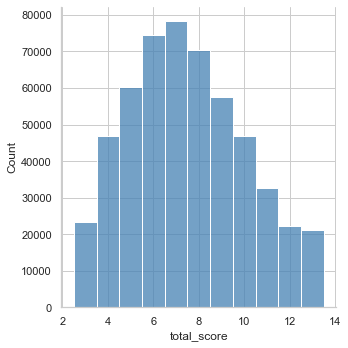

In [101]:
# plot distribution of total_score for better visualization
plt.figure(figsize = (12,10))
sns.displot(rfm['total_score'], discrete=True, color='steelblue')
plt.savefig('histogram.png', dpi=200)

In [24]:
# step 8 - define user segmentation
def tiers(df):
    if df['total_score'] >= 11:
        return 'High Value Customer'
    elif ((df['total_score'] >= 8) and (df['total_score'] < 11)):
        return 'Gold Customer'
    elif ((df['total_score'] >= 6) and (df['total_score'] < 8)):
        return 'Silver Customer'
    elif ((df['total_score'] >= 4) and (df['total_score'] < 6)):
        return 'Bronze Customer'
    else:
        return 'Churning'

In [25]:
rfm['Segmentation'] = rfm.apply(tiers, axis=1)
rfm.head(100)

,recency,frequency,monetary,R,M,F,total_score,Segmentation
user_id,,,,,,,,
225644257,18.819780,1,40.91,3,1,1,5.0,Bronze Customer
253299396,24.546169,1,246.85,3,3,1,7.0,Silver Customer
256164170,10.651921,1,113.23,4,1,1,6.0,Silver Customer
296197073,0.631377,1,51.46,5,1,1,7.0,Silver Customer
299358698,21.860127,1,154.19,3,2,1,6.0,Silver Customer
...,...,...,...,...,...,...,...,...
456372497,3.863935,1,28.29,5,1,1,7.0,Silver Customer
456575945,35.840648,1,437.33,2,3,1,6.0,Silver Customer
456810531,32.649699,2,266.70,2,3,2,7.0,Silver Customer


In [26]:
# step 9
rfm_segmentation = rfm.groupby('Segmentation').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary':['mean','count']
}).round(0)

rfm_segmentation

# rfm_segmentation = pd.DataFrame(rfm_segmentation)

recency frequency monetary        
                       mean      mean     mean   count
Segmentation                                          
Bronze Customer        40.0       1.0    160.0  106999
Churning               52.0       1.0     74.0   23197
Gold Customer          19.0       2.0    889.0  174683
High Value Customer     9.0       5.0   2901.0   76022
Silver Customer        27.0       1.0    332.0  152671

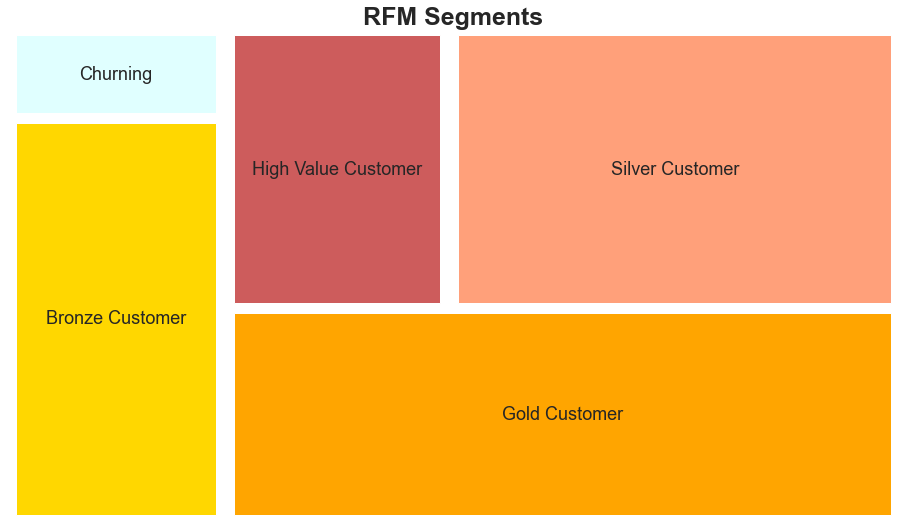

In [103]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
colors = ['gold','lightcyan','orange','indianred','lightsalmon']
counts = [106999, 23197, 174683, 76022, 152671]
squarify.plot(sizes=counts,
             label=['Bronze Customer',
                   'Churning',
                   'Gold Customer',
                   'High Value Customer',
                   'Silver Customer'], alpha=1, color=colors, pad=True,
             text_kwargs={'fontsize':18})
plt.title('RFM Segments', fontsize=25, fontweight='bold')
plt.axis('off')
plt.savefig('rfm.png', dpi=200)
plt.show()

## Part II

In [28]:
# step 1
df['items'] = df.category_code.str.split('.').str[-1]
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,items
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,water_heater
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,notebook
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,smartphone
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,desktop
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,keds


In [65]:
data2 = df[['user_id','event_type','items','event_time']]
df_purchases = data2.loc[data2.event_type == 'purchase']
df_purchases = df_purchases[['user_id','items']]
df_purchases.head()

,user_id,items
162,543272936,smartphone
308,551377651,smartphone
442,555332717,toilet
574,524601178,headphone
603,551377651,headphone


In [48]:
# step 2
item_cnt = df_purchases.groupby('items', as_index=False).agg(count = ('user_id', lambda x:x.count()))
item_cnt = item_cnt.sort_values('count', ascending=False)
item_cnt.head(50)

,items,count
93,smartphone,720067
42,headphone,71181
113,tv,51726
18,clocks,38073
121,washer,35739
66,notebook,33870
116,vacuum,30340
79,refrigerators,19291
87,shoes,12166
103,tablet,11722


In [49]:
item_cnt['count'].describe()

count       125.000000
mean       9670.104000
std       64807.342127
min           1.000000
25%         129.000000
50%         860.000000
75%        2958.000000
max      720067.000000
Name: count, dtype: float64

[Text(0, 0, 'smartphone'),
 Text(1, 0, 'headphone'),
 Text(2, 0, 'tv'),
 Text(3, 0, 'clocks'),
 Text(4, 0, 'washer'),
 Text(5, 0, 'notebook'),
 Text(6, 0, 'vacuum'),
 Text(7, 0, 'refrigerators'),
 Text(8, 0, 'shoes'),
 Text(9, 0, 'tablet'),
 Text(10, 0, 'microwave'),
 Text(11, 0, 'iron'),
 Text(12, 0, 'telephone'),
 Text(13, 0, 'blender'),
 Text(14, 0, 'desktop'),
 Text(15, 0, 'kettle'),
 Text(16, 0, 'oven'),
 Text(17, 0, 'water_heater'),
 Text(18, 0, 'alarm'),
 Text(19, 0, 'player'),
 Text(20, 0, 'printer'),
 Text(21, 0, 'air_heater'),
 Text(22, 0, 'sewing_machine'),
 Text(23, 0, 'subwoofer'),
 Text(24, 0, 'keds'),
 Text(25, 0, 'meat_grinder'),
 Text(26, 0, 'drill'),
 Text(27, 0, 'carriage'),
 Text(28, 0, 'videoregister'),
 Text(29, 0, 'saw'),
 Text(30, 0, 'mixer'),
 Text(31, 0, 'chair'),
 Text(32, 0, 'scales'),
 Text(33, 0, 'generator'),
 Text(34, 0, 'bed'),
 Text(35, 0, 'monitor'),
 Text(36, 0, 'bag'),
 Text(37, 0, 'hood'),
 Text(38, 0, 'hob'),
 Text(39, 0, 'hdd'),
 Text(40, 0, 'hai

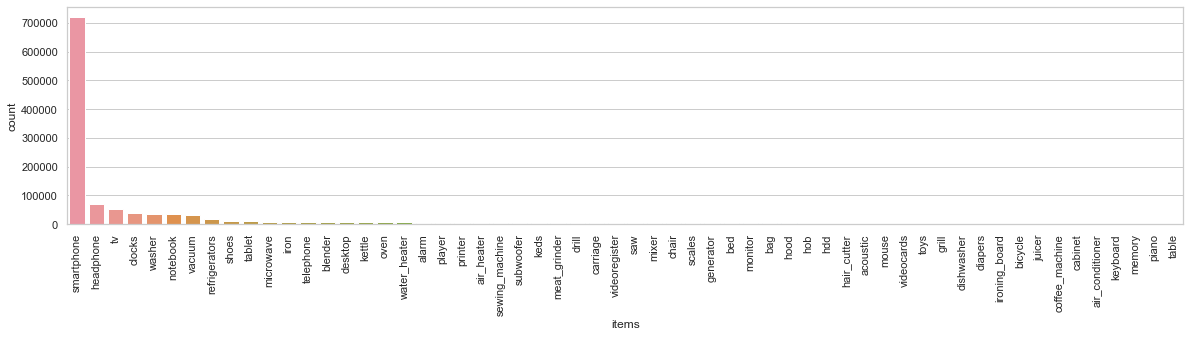

In [64]:
# step 3 - visualising the frequency of items
sns.set(style='whitegrid', rc = {'figure.figsize':(20,4)})
ax = sns.barplot(x='items', y='count', data=item_cnt[item_cnt['count'] >= 1000])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [94]:
# step 4
df_each_trans = data2.loc[data2.event_type == 'purchase']
df_each_trans = df_each_trans[['user_id','event_time','items']]
trans = df_each_trans.groupby(['user_id', 'event_time'], as_index=False)['items'].apply(lambda x:','.join(x))

trans.head(50)

,,user_id,event_time,items
user_id,event_time,,,
225644257,2019-11-12 04:19:31 UTC,225644257,2019-11-12 04:19:31 UTC,hdd
253299396,2019-11-06 10:53:31 UTC,253299396,2019-11-06 10:53:31 UTC,hood
256164170,2019-11-20 08:21:14 UTC,256164170,2019-11-20 08:21:14 UTC,water_heater
296197073,2019-11-30 08:50:49 UTC,296197073,2019-11-30 08:50:49 UTC,videoregister
299358698,2019-11-09 03:21:25 UTC,299358698,2019-11-09 03:21:25 UTC,smartphone
303160429,2019-10-13 13:25:29 UTC,303160429,2019-10-13 13:25:29 UTC,clocks
304707635,2019-11-13 11:02:34 UTC,304707635,2019-11-13 11:02:34 UTC,smartphone
307138432,2019-11-08 05:14:41 UTC,307138432,2019-11-08 05:14:41 UTC,smartphone
308228668,2019-11-19 11:43:58 UTC,308228668,2019-11-19 11:43:58 UTC,ironing_board


In [95]:
d = {}
for cus, item in zip(trans['user_id'],trans['items']):
    if cus in d:
        d[cus].append(item)
    else:
        d[cus] = []
        d[cus].append(item)
d

{225644257: ['hdd'],
 253299396: ['hood'],
 256164170: ['water_heater'],
 296197073: ['videoregister'],
 299358698: ['smartphone'],
 303160429: ['clocks'],
 304707635: ['smartphone'],
 307138432: ['smartphone'],
 308228668: ['ironing_board'],
 310402868: ['microwave'],
 315835135: ['desktop'],
 315835876: ['smartphone'],
 323651575: ['telephone'],
 340041246: ['tv'],
 353600697: ['shoes'],
 366237542: ['smartphone', 'washer'],
 369234855: ['smartphone'],
 369801696: ['smartphone', 'smartphone', 'smartphone'],
 378784732: ['bicycle'],
 384989212: ['oven'],
 389051600: ['smartphone'],
 392821421: ['washer'],
 397810898: ['vacuum'],
 401021311: ['tv'],
 402311094: ['carriage'],
 403013066: ['smartphone', 'smartphone'],
 403810661: ['smartphone', 'smartphone'],
 404851685: ['subwoofer', 'subwoofer', 'player', 'player'],
 410333972: ['smartphone'],
 413528456: ['smartphone'],
 415423761: ['smartphone'],
 415873351: ['smartphone', 'smartphone'],
 418115333: ['mouse'],
 419697235: ['blender']

In [96]:
transactions = []
for trans in d.values():
    transactions.append(trans)
transactions

[['hdd'],
 ['hood'],
 ['water_heater'],
 ['videoregister'],
 ['smartphone'],
 ['clocks'],
 ['smartphone'],
 ['smartphone'],
 ['ironing_board'],
 ['microwave'],
 ['desktop'],
 ['smartphone'],
 ['telephone'],
 ['tv'],
 ['shoes'],
 ['smartphone', 'washer'],
 ['smartphone'],
 ['smartphone', 'smartphone', 'smartphone'],
 ['bicycle'],
 ['oven'],
 ['smartphone'],
 ['washer'],
 ['vacuum'],
 ['tv'],
 ['carriage'],
 ['smartphone', 'smartphone'],
 ['smartphone', 'smartphone'],
 ['subwoofer', 'subwoofer', 'player', 'player'],
 ['smartphone'],
 ['smartphone'],
 ['smartphone'],
 ['smartphone', 'smartphone'],
 ['mouse'],
 ['blender'],
 ['smartphone'],
 ['notebook'],
 ['smartphone', 'smartphone'],
 ['tablet'],
 ['smartphone'],
 ['smartphone'],
 ['vacuum'],
 ['water_heater'],
 ['bed'],
 ['smartphone', 'smartphone'],
 ['smartphone'],
 ['refrigerators', 'refrigerators'],
 ['washer'],
 ['smartphone'],
 ['smartphone'],
 ['smartphone'],
 ['smartphone'],
 ['oven'],
 ['smartphone'],
 ['clocks'],
 ['refrigerat

In [108]:
rules = apriori(transactions, min_support=0.005, min_confidence=0.25, min_length=2)

In [109]:
# step 5
res = list(rules)
res

[RelationRecord(items=frozenset({'smartphone'}), support=0.6033093940461643, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'smartphone'}), confidence=0.6033093940461643, lift=1.0)]),
 RelationRecord(items=frozenset({'clocks', 'smartphone'}), support=0.013677629260905745, ordered_statistics=[OrderedStatistic(items_base=frozenset({'clocks'}), items_add=frozenset({'smartphone'}), confidence=0.32125720825813264, lift=0.5324916393288425)]),
 RelationRecord(items=frozenset({'headphone', 'smartphone'}), support=0.023361420764208017, ordered_statistics=[OrderedStatistic(items_base=frozenset({'headphone'}), items_add=frozenset({'smartphone'}), confidence=0.29669388046557016, lift=0.4917773258522601)]),
 RelationRecord(items=frozenset({'notebook', 'smartphone'}), support=0.011331179297264474, ordered_statistics=[OrderedStatistic(items_base=frozenset({'notebook'}), items_add=frozenset({'smartphone'}), confidence=0.2979646148538761, lift=0.49388359901963713)]),
